# Exploratory Analysis - Coding Challenge
<hr style="border:2px solid black">

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

#### Read in the ratings and movies tables

- Download the data from https://grouplens.org/datasets/movielens/
- Take the **small** dataset: `ml-latest-small.zip`
- Extract the tables from the `.zip` archive

- ⭐ Advanced Challenge: Try out to process the larger datasets



In [130]:
movie_df = pd.read_csv('./data/ml-latest-small/movies.csv')
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [131]:
rating_df = pd.read_csv('./data/ml-latest-small/ratings.csv')
rating_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [132]:
links_df = pd.read_csv('./data/ml-latest-small/links.csv')
links_df

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [133]:
tags_df = pd.read_csv('./data/ml-latest-small/tags.csv')
tags_df

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


**Merge data**

In [134]:
rating_movie = pd.merge(rating_df, movie_df, on = 'movieId')
rating_movie

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [135]:
links_merge = pd.merge(rating_movie,links_df, on = 'movieId')
links_merge

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller,118745,30948.0
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama,66806,90351.0
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller,798722,70193.0
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller,1540011,351211.0


---
## Ratings table

#### How many unique users and movies are in the dataset?

In [136]:
rating_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [137]:
#calculate unique users
rating_df['userId'].nunique()

610

In [138]:
#calculate unique movies
rating_df['movieId'].nunique()

9724

#### What is the average rating

In [139]:
rating_df['rating'].mean()

3.501556983616962

#### which rating appears the most?

In [140]:
rating_df['rating'].mode()

0    4.0
Name: rating, dtype: float64

#### What is the percentage of 5 star ratings?

- ⭐**Bonus**: How are the ratings distributed? Derive a relative frequency table for the `rating` column!

In [141]:
# Calculate the number of 5-star ratings
five_star = rating_df[rating_df['rating'] == 5]
five_star

,userId,movieId,rating,timestamp
3,1,47,5.0,964983815
4,1,50,5.0,964982931
6,1,101,5.0,964980868
8,1,151,5.0,964984041
9,1,157,5.0,964984100
...,...,...,...,...
100814,610,158238,5.0,1479545219
100829,610,164179,5.0,1493845631
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047


In [142]:
# Calculate the percentage of 5-star ratings
percent_five = (len(five_star)/len(rating_df['rating']))*100
percent_five

13.101471696616288

Calculate relative frequency

In [200]:
# Calculate the relative frequency of each rating
rating_counts = rating_df['rating'].value_counts()
rating_counts

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [201]:
relative_frequencies = rating_counts / rating_counts.sum()
relative_frequencies

4.0    0.265957
3.0    0.198808
5.0    0.131015
3.5    0.130271
4.5    0.084801
2.0    0.074884
2.5    0.055040
1.0    0.027877
1.5    0.017762
0.5    0.013586
Name: rating, dtype: float64

In [202]:
# Create a DataFrame for the relative frequency table
relative_frequency_table = pd.DataFrame({\
    'Rating': rating_counts.index,
    'Relative Frequency': relative_frequencies
    })
relative_frequency_table

,Rating,Relative Frequency
4.0,4.0,0.265957
3.0,3.0,0.198808
5.0,5.0,0.131015
3.5,3.5,0.130271
4.5,4.5,0.084801
2.0,2.0,0.074884
2.5,2.5,0.055040
1.0,1.0,0.027877
1.5,1.5,0.017762
0.5,0.5,0.013586


In [203]:
relative_frequency_table.sort_values('Rating')

,Rating,Relative Frequency
0.5,0.5,0.013586
1.0,1.0,0.027877
1.5,1.5,0.017762
2.0,2.0,0.074884
2.5,2.5,0.055040
3.0,3.0,0.198808
3.5,3.5,0.130271
4.0,4.0,0.265957
4.5,4.5,0.084801
5.0,5.0,0.131015


---
#### Count the number of ratings *per* user

- Hint: Use a `groupby` statement and the `count` method

In [205]:
rating = rating_df.groupby('userId')['rating'].count()
rating = rating.reset_index()
rating

,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44
...,...,...
605,606,1115
606,607,187
607,608,831
608,609,37


- How many users have rated more than 20 movies?

In [209]:
rating_20 = rating[rating > 20]
rating_20 = rating_20.value_counts()
len(rating_20)

576

- How many movies rated the user with the most/ least ratings?

In [211]:
low_rating = rating.min()
low_rating

userId     1
rating    20
dtype: int64

In [210]:
high_rating = rating.max()
high_rating

userId     610
rating    2698
dtype: int64

-  What is the *median* number of ratings?

In [212]:
rating_df['rating'].median()

3.5

- Draw a histogram or density plot of the distribution of the number of ratings per user! 

    - How would you characterize the distribution?
    - Hint: `sns.histplot()`

<AxesSubplot: xlabel='rating', ylabel='Count'>

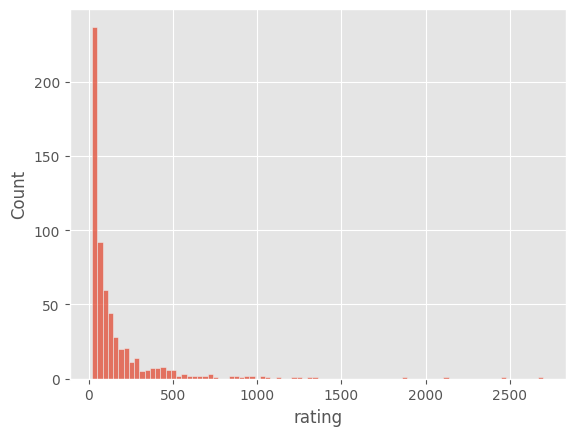

In [187]:
sns.histplot(
    data = rating_df,
    x = rating
)

---
#### Calculate the average rating *per user*

- Hint: use a `groupby` statement, select the `rating` column and apply the `mean` method

In [215]:
avg_rating_user = rating_df.groupby('userId')[['rating']].mean()
avg_rating_user

,rating
userId,
1,4.366379
2,3.948276
3,2.435897
4,3.555556
5,3.636364
...,...
606,3.657399
607,3.786096
608,3.134176


- Which user gave the worst ratings on average, which user gave the best ratings?

In [184]:
worst_rating = avg_rating_user.min()
worst_rating

1.275

In [185]:
best_rating = avg_rating_user.max()
best_rating

5.0

- ⭐**Bonus**: Use your previous results and filter out users that have rated less than 20 movies! Do your results change?

In [221]:
rating.min()

userId     1
rating    20
dtype: int64

- Plot the distribution of average ratings! How would you characterize the distribution?

<AxesSubplot: xlabel='rating', ylabel='Count'>

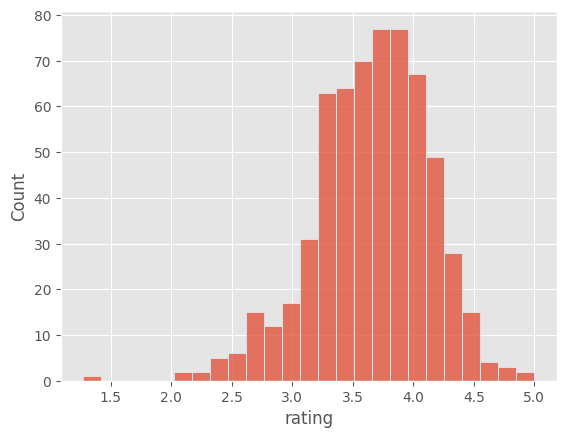

In [186]:
sns.histplot(
    data = rating_df,
    x = avg_rating_user
    
)

- ⭐**Bonus**: Are users who have given more ratings also stricter in their ratings?

    - Derive the correlation between the average rating and the number of ratings per user!
    - Draw a scatterplot of the user averages and number of ratings
    - Only consider users that have rated at least 10 movies

In [188]:
realtion = avg_rating_user.corr(rating)
realtion

-0.19899727099822653

In [226]:
user_avg = rating_df.groupby['userId'][['rating']].mean
user_avg


TypeError: 'method' object is not subscriptable

In [222]:
sns.scatterplot(
    data = realtion,
    x = user_avg
)

ValueError: If using all scalar values, you must pass an index

--- 
## Movies table

#### Are there any duplicated titles?

Hint: use the `duplicated` method

In [216]:
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [220]:
movie_df['title'].duplicated().value_counts()

False    9737
True        5
Name: title, dtype: int64

#### Are there any `movieId`s listed in the movies table that are not in the `ratings` table?

- Hint: Use the `isin()` method

In [231]:
missing_ids = movie_df[~movie_df["movieId"].isin(rating_df["movieId"].unique())]
missing_ids

,movieId,title,genres
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller
2211,2939,Niagara (1953),Drama|Thriller
2499,3338,For All Mankind (1989),Documentary
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War
4037,5721,"Chosen, The (1981)",Drama
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance
4598,6849,Scrooge (1970),Drama|Fantasy|Musical
4704,7020,Proof (1991),Comedy|Drama|Romance
5020,7792,"Parallax View, The (1974)",Thriller


#### ⭐ Bonus: Extract the year out of the title column

- Use the `pandas.Series.str.extract()` method with a regular expression
- Hint: check out the [following regular expression](https://regex101.com/r/dJkxR0/1)

In [232]:
movie_df['year'] = movie_df['title'].str.extract(r"\((\d{4})\)")
movie_df

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


#### ⭐ Bonus: Split the genre column into a separate genre table

1. Use the `pandas.Series.str.split` method
2. Then use the `pandas.Series.explode` method to clean up the list entries
3. Which `movieId` has the most genres assigned?

In [233]:
# Create a copy of the movies DataFrame
movies = movie_df.copy()

In [234]:
# Split the genres column into separate genre columns
movies['genres'] = movies['genres'].str.split('|')

In [237]:
# Explode the genres column to create multiple rows with a single genre
genres_table = movies.explode('genres')
genres_table

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure,1995
0,1,Toy Story (1995),Animation,1995
0,1,Toy Story (1995),Children,1995
0,1,Toy Story (1995),Comedy,1995
0,1,Toy Story (1995),Fantasy,1995
...,...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018


In [239]:
# Reset the index of the genres table
genres_table = genres_table.reset_index(drop=True)
genres_table

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure,1995
1,1,Toy Story (1995),Animation,1995
2,1,Toy Story (1995),Children,1995
3,1,Toy Story (1995),Comedy,1995
4,1,Toy Story (1995),Fantasy,1995
...,...,...,...,...
22079,193583,No Game No Life: Zero (2017),Fantasy,2017
22080,193585,Flint (2017),Drama,2017
22081,193587,Bungo Stray Dogs: Dead Apple (2018),Action,2018
22082,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,2018


---
## Ratings and movies table

#### Merge/join the ratings and movies tables together

- use the `movieId` as common key
- hint: `df.merge(...)`

---
#### Count the number of ratings per movie title!

- What are the top 10 most rated movies in the dataset?

--- 
##### Which movies are most polarizing?

- For each movie, calculate the standard deviation divided by the average rating (This is called the [coefficient of variation](https://datacollection.jrc.ec.europa.eu/wordef/coefficient-of-variation))
- Filter out movies that have been rated by less than 100 users
- Look at the top 10 movies that have the highest coefficient of variation!
 

---

#### Calculate the average rating per movie title!

- Make a visualization of the distribution of average ratings per movie

- Which movie was rated the best? Which movie was rated the worst?
    - ⭐**Bonus**: Filter out movies that have been rated by less than 30 users. Do your results change? Why?

- ⭐**Bonus**: Did the average rating of movies improve over time? 

    - Use the `year` that you have extracted in a previous ⭐bonus exercises
    - Visualize your findings in a nice plot
    - Post your plot in slack!